# Preprocessing

Data in this notebook are already resampled.
Now, they need to be prepared to support training of
convolution neural network.

In [1]:
import pickle
import os

In [2]:
# load the data
data_filename = 'ondrejov-halpha-labeled-resampled.pickle'
with open(os.path.join('data', data_filename), 'rb') as f:
    spectra = pickle.load(f)

In [3]:
import numpy as np

In [4]:
# create data matrix X
ids_list = []
X_list = []
y_list = []
for spectrum, data in spectra.items():
    ids_list.append([spectrum])
    X_list.append(data['resampled_flux'])
    y_list.append([data['label']])
    
X = np.array(X_list)
ids = np.array(ids_list)
y = np.array(y_list)
ids.shape, X.shape, y.shape

((13208, 1), (13208, 4000), (13208, 1))

## PCA

Let's see the data in 2D.

In [5]:
import sklearn.decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_2d_pca(X):
    pca = sklearn.decomposition.PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    _ = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        alpha=0.5,
        c=y,
        #s=y + 1
    )
    _ = plt.colorbar()

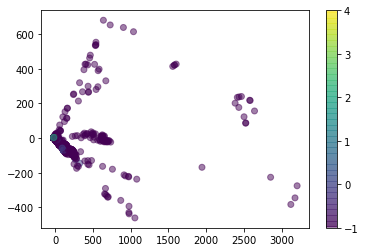

In [7]:
plot_2d_pca(X)

In [8]:
import sklearn.preprocessing

### Zero Mean and Unit Variance

In [9]:
X_scaled = sklearn.preprocessing.scale(
    X,
    with_mean=True,
    with_std=True,
)

In [10]:
import random

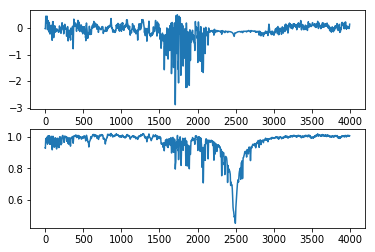

In [11]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_scaled[idx])
_ = ax2.plot(X[idx])

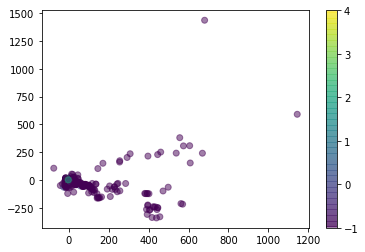

In [12]:
plot_2d_pca(X_scaled)

In [13]:
X_scaled.mean(axis=0)

array([ -1.44178363e-14,  -3.13990035e-14,  -8.40259284e-15, ...,
        -7.82702189e-15,   2.81097072e-15,   5.81033724e-14])

In [14]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

### MinMax Scaler

In [15]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

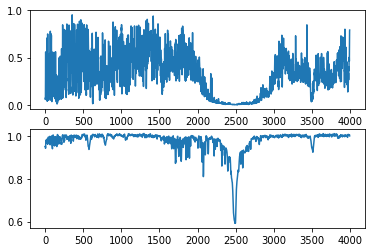

In [16]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_minmax[idx])
_ = ax2.plot(X[idx])

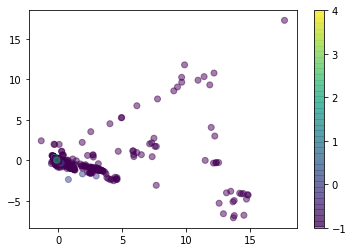

In [17]:
plot_2d_pca(X_minmax)

### Normalization

Scaling individual samples to have unit norm.

In [18]:
X_normalized = sklearn.preprocessing.normalize(X, norm='l1')

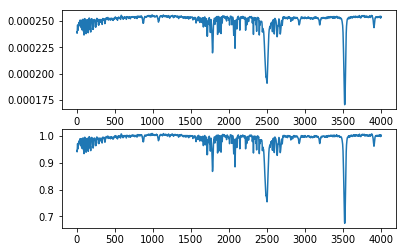

In [19]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_normalized[idx])
_ = ax2.plot(X[idx])

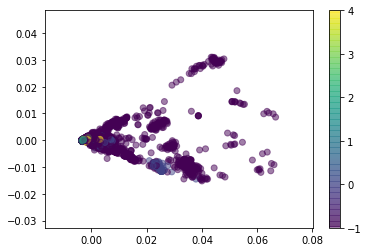

In [20]:
plot_2d_pca(X_normalized)

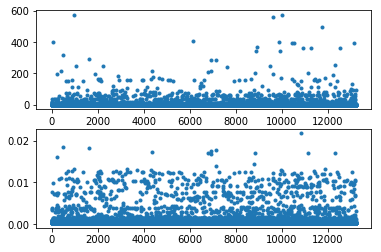

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X.max(axis=1), '.')
_ = ax2.plot(X_normalized.max(axis=1), '.')

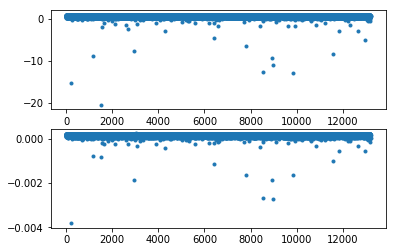

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X.min(axis=1), '.')
_ = ax2.plot(X_normalized.min(axis=1), '.')

## Division by Absolute Maximum

Subtract 1 because normalized spectrum is rectified to 1.
Then divide by abosolute maximum to scale in range [-1, 1].
This transformation discarts intensities, is linear and
does not affect shape.

In [23]:
X_foo = (X - 1) / np.absolute(X - 1).max(axis=1).reshape(X.shape[0], 1)

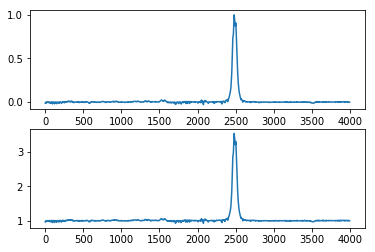

In [24]:
idx = random.randrange(X.shape[0])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_foo[idx])
_ = ax2.plot(X[idx])

In [25]:
X_foo.mean(axis=0)

array([-0.13306616, -0.13682136, -0.13967719, ...,  0.0012216 ,
        0.00114303,  0.00104393])

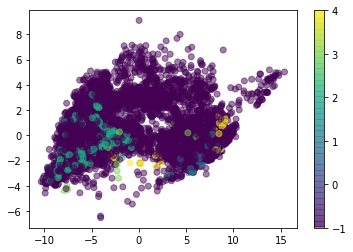

In [26]:
plot_2d_pca(X_foo)